In [ ]:
import os
import sys

sys.path.append('../')

from matplotlib.colors import Normalize
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from utils.data import load_mat
from utils.visualization import *

data_path = '../data/'
results_path = '../results/'

### Sinogram

In [ ]:
sinogram = load_mat(os.path.join(data_path, 'ANIMAL_LAYER.mat'))

plt.figure(figsize=(6,4))
plt.imshow(sinogram[:,960:1740], cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('sinogram.png', bbox_inches='tight', dpi=128)

### PSF Stack

In [ ]:
psfs = np.load('../data/psfs.npy')

fig = plt.figure(figsize=(7,7), facecolor='white')
gs = gridspec.GridSpec(15, 15)
for i in range(8):
    plt.subplot(gs[i:i+8,i:i+8])
    plt.imshow(psfs[7-i,:,:], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.savefig('../figures/psfs_stack.jpg', bbox_inches='tight')

### Full Image Stack

In [ ]:
obss = np.load(os.path.join('../data', "obs_full_imgs.npy"))

In [ ]:
fig = plt.figure(figsize=(7,7), facecolor='white')
step = 40
gs = gridspec.GridSpec(15, 15)
for i in range(8):
    plt.subplot(gs[i:i+8,i:i+8])
    plt.imshow(obss[i,:,:], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.savefig('../figures/obs_full_stack.jpg', bbox_inches='tight')

### Deblurred Full Image

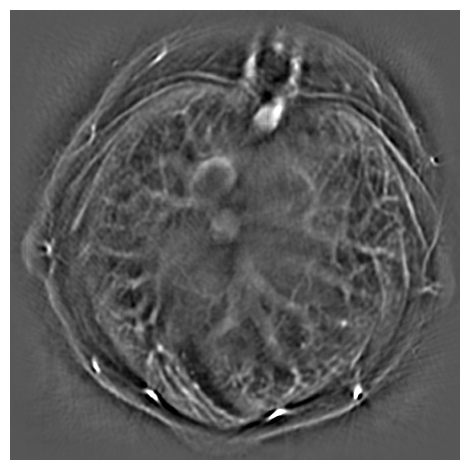

In [27]:
rec_wiener = load_mat(os.path.join(results_path, 'sb_wiener_invivo.mat')) 
rec_wiener = standardize(rec_wiener)

norm = Normalize(vmax=7, vmin=-3.5)
plt.imshow(rec_wiener, cmap='gray', norm=norm)
plt.axis('off')
plt.tight_layout()
plt.savefig('rec.png', bbox_inches='tight', dpi=128)

### Small Patch Image Stack

In [ ]:
i, j = 0, 3
fig = plt.figure(figsize=(7,7), facecolor='white')
step = 40
gs = gridspec.GridSpec(15, 15)
for k in range(8):
    plt.subplot(gs[k:k+8,k:k+8])
    plt.imshow(obss[k,40*i:40*i+80, 40*j:40*j+80], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.savefig('/obs_stack.jpg', bbox_inches='tight')

### Clean Small Patch

In [ ]:
i, j = 18, 15
plt.imshow(rec_wiener[20*i:20*i+80, 20*j:20*j+80], cmap='gray', norm=norm)
plt.axis('off')
plt.tight_layout()
plt.savefig('rec_patch.png', bbox_inches='tight', dpi=128)

### Wavefront

### Single-body

In [ ]:
plt.figure(figsize=(5,5))
X = np.arange(-11.2, 11.2, 0.04)
Y = np.arange(-11.2, 11.2, 0.04)
v0, v1 = 1500, 1600
R = 9.5
XX, YY = np.meshgrid(X, Y)
SoS = np.ones((560, 560)) * v0
SoS[XX**2 + YY**2 < R**2] = v1
plt.title('Speed of Sound Distribution', fontsize=15)
plt.title(loc='left', label='$V_b$', fontsize=25, y=0.85, x=0.1, color="white")
plt.title(loc='right', label='$V_a$', fontsize=25, y=0.75, x=0.5, color="black")
plt.imshow(SoS)
plt.xticks([])
plt.yticks([])

### PSFs

In [ ]:
fig = plt.figure(figsize=(12,6), facecolor='white')
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(psfs[i,:,:], cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('../figures/psfs.jpg', bbox_inches='tight')